C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Peter\AppData\Local\Temp\ipykernel_21320\3521936499.py:93: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


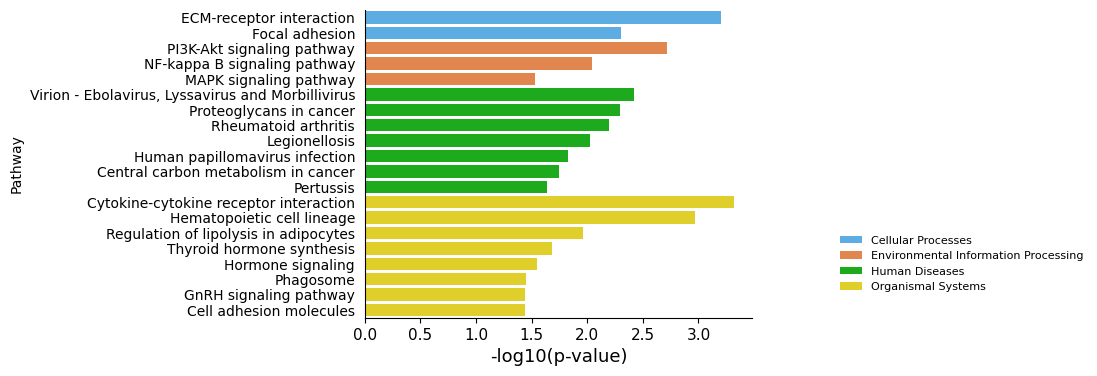

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the enrichment analysis results
df = pd.read_csv("../data/Enrichment_results.csv")

# Filter significant pathways based on p-value < 0.05 and sort by q-value
significant_df = df[df["pvalue"] < 0.05].sort_values("qvalue")

# Calculate -log10(p-value) for visualization purposes
significant_df["-log10(pvalue)"] = -np.log10(significant_df["pvalue"])

# Extract the top 20 pathways for visualization
plot_df = significant_df.head(20).copy()

# KEGG level 1 pathway classification dictionary
pathway_level1_class = {
    "Amoebiasis": "Human Diseases",
    "Autoimmune thyroid disease": "Human Diseases",
    "Cell adhesion molecules": "Organismal Systems",
    "Central carbon metabolism in cancer": "Human Diseases",
    "Cytokine-cytokine receptor interaction": "Organismal Systems",
    "ECM-receptor interaction": "Cellular Processes",
    "Focal adhesion": "Cellular Processes",
    "GnRH signaling pathway": "Organismal Systems",
    "Hematopoietic cell lineage": "Organismal Systems",
    "Hormone signaling": "Organismal Systems",
    "Human papillomavirus infection": "Human Diseases",
    "JAK-STAT signaling pathway": "Environmental Information Processing",
    "Legionellosis": "Human Diseases",
    "MAPK signaling pathway": "Environmental Information Processing",
    "Malaria": "Human Diseases",
    "NF-kappa B signaling pathway": "Environmental Information Processing",
    "Ovarian steroidogenesis": "Organismal Systems",
    "PI3K-Akt signaling pathway": "Environmental Information Processing",
    "Pathways in cancer": "Human Diseases",
    "Pertussis": "Human Diseases",
    "Phagosome": "Organismal Systems",
    "Proteoglycans in cancer": "Human Diseases",
    "Regulation of lipolysis in adipocytes": "Organismal Systems",
    "Rheumatoid arthritis": "Human Diseases",
    "Thyroid hormone synthesis": "Organismal Systems",
    "Viral protein interaction with cytokine and cytokine receptor": "Human Diseases",
    "Virion - Ebolavirus, Lyssavirus and Morbillivirus": "Human Diseases",
    "Virion - Flavivirus and Alphavirus": "Human Diseases",
    "Virion - Hepatitis viruses": "Human Diseases"
}

# Add the KEGG Level 1 category information to the dataframe
plot_df["category"] = plot_df["pathway"].map(pathway_level1_class).fillna("Other")

# Sort the dataframe: first by category, then by p-value (descending order)
plot_df = plot_df.sort_values(by=["category", "-log10(pvalue)"], ascending=[True, False])

# Set pathway names as an ordered category for proper ordering in the plot
plot_df["pathway"] = pd.Categorical(plot_df["pathway"], categories=plot_df["pathway"], ordered=True)

# Define a custom color palette for each pathway category
pathway_colors = {
    "Human Diseases": "#06C106",                    
    "Organismal Systems": "#FFE60B",                
    "Environmental Information Processing": "#FA8036",
    "Cellular Processes": "#46B0FA",
    "Other": "#999999"
}

# Create a palette dictionary based on the categories in the dataframe
palette = {cat: pathway_colors.get(cat, "#999999") for cat in plot_df["category"].unique()}

# Create the bar plot
plt.figure(figsize=(5, 4))
barplot = sns.barplot(
    data=plot_df,
    y="pathway",
    x="-log10(pvalue)",
    hue="category",
    dodge=False,
    palette=palette
)

# Remove the top and right spines of the plot for aesthetics
sns.despine(top=True, right=True)

# Remove y-axis tick marks
plt.tick_params(axis='y', which='both', left=False)

# Adjust x-axis tick label size for better readability
plt.tick_params(axis='x', labelsize=11)

# Set axis labels and legend properties
plt.xlabel("-log10(p-value)", fontsize=13)
plt.ylabel("Pathway")

# Adjust the legend placement and styling
plt.legend(bbox_to_anchor=(1.2, 0.3), loc='upper left', frameon=False, fontsize=8)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()